Data Penjualan

In [100]:
import pandas as pd

#buat data penjualan toko
data = {
    "Tanggal" : ["2025-02-01", "2025-02-02", "2025-02-03", "2025-02-04", "2025-02-05", "2025-02-06", "2025-02-07", "2025-02-08", "2025-02-09", "2025-02-10"],
    "Produk" : ["Minyak Goreng", "Beras", "Gula", "Tepung", "Mie Instan", "Mie Goreng", "Nasi Goreng", "Rinso", "Segar Dingin", "Teh Pucuk"],
    "Jumlah Terjual" : [110, 5, 7, 3, 12, 10, 14, 15, 12, 17],
    "Stok" : [20, 15, 8, 12, 25, 16, 13, 7, 18, 11],
    "Harga Satuan" : [15000, 12000, 13000, 11000, 3000, 10000, 12000, 2000, 7000, 4000],
}

#Simpan dalam DataFrame
df = pd.DataFrame(data)

#Simpan sebagai file csv
df.to_csv("Gian Axel Kurnia R_2306006_Pertemuan 1_Latihan Workflow AI.csv", index=False)

df

,Tanggal,Produk,Jumlah Terjual,Stok,Harga Satuan
0,2025-02-01,Minyak Goreng,110,20,15000
1,2025-02-02,Beras,5,15,12000
2,2025-02-03,Gula,7,8,13000
3,2025-02-04,Tepung,3,12,11000
4,2025-02-05,Mie Instan,12,25,3000
5,2025-02-06,Mie Goreng,10,16,10000
6,2025-02-07,Nasi Goreng,14,13,12000
7,2025-02-08,Rinso,15,7,2000
8,2025-02-09,Segar Dingin,12,18,7000
9,2025-02-10,Teh Pucuk,17,11,4000


Mengunggah data

In [101]:
df = pd.read_csv("Gian Axel Kurnia R_2306006_Pertemuan 1_Latihan Workflow AI.csv")

print(df.head(10))

      Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan
0  2025-02-01  Minyak Goreng             110    20         15000
1  2025-02-02          Beras               5    15         12000
2  2025-02-03           Gula               7     8         13000
3  2025-02-04         Tepung               3    12         11000
4  2025-02-05     Mie Instan              12    25          3000
5  2025-02-06     Mie Goreng              10    16         10000
6  2025-02-07    Nasi Goreng              14    13         12000
7  2025-02-08          Rinso              15     7          2000
8  2025-02-09   Segar Dingin              12    18          7000
9  2025-02-10      Teh Pucuk              17    11          4000


Membersihkan dan mempersiapkan data

In [102]:
#cek apakah ada data yang kosong
print(df.isnull().sum())

#konversi kolom "tanggal" ke format datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]

df["Keuntungan"] = df["Total Penjualan"] - (df["Jumlah Terjual"] * 10000)
#menampilkan data
print(df.head(10))

Tanggal           0
Produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64
     Tanggal         Produk  Jumlah Terjual  Stok  Harga Satuan  \
0 2025-02-01  Minyak Goreng             110    20         15000   
1 2025-02-02          Beras               5    15         12000   
2 2025-02-03           Gula               7     8         13000   
3 2025-02-04         Tepung               3    12         11000   
4 2025-02-05     Mie Instan              12    25          3000   
5 2025-02-06     Mie Goreng              10    16         10000   
6 2025-02-07    Nasi Goreng              14    13         12000   
7 2025-02-08          Rinso              15     7          2000   
8 2025-02-09   Segar Dingin              12    18          7000   
9 2025-02-10      Teh Pucuk              17    11          4000   

   Total Penjualan  Keuntungan  
0          1650000      550000  
1            60000       10000  
2            91000       21000  
3            3300

Melatih Machine Learning

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#pilih fitur (x) dan target (y)
x = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#buat model regresi logistik
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Akurasi model: ", accuracy_score(y_test, y_pred))

Akurasi model:  1.0


Execute

In [104]:
#Contoh produk baru (jumlah terjual 8, stok sisa 3)
produk_baru = [[8, 3]]
prediksi = model.predict(produk_baru)

if prediksi[0] == 1:
  print("Produk perlu di restock!")
else:
  print("Stok Masih Cukup")

Stok Masih Cukup


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Analisis data

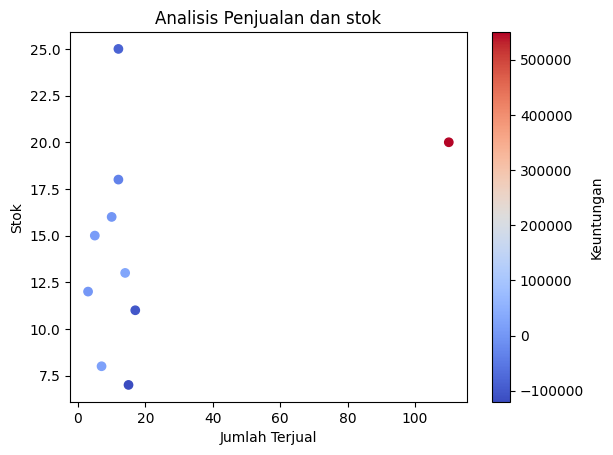

In [105]:
import matplotlib.pyplot as plt

plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan stok")
plt.colorbar(label="Keuntungan")
plt.show()